Michael cho elective homework 1 

In [33]:
import tensorflow as tef
import numpy as num
import cv2 as cv2
import matplotlib.pyplot as ply
from sklearn.model_selection import train_test_split

In [34]:
# Read a npz file containing the images
dataset = num.load("C:/Users/micha/ORL_faces.npz")

# Checking the data file
print('The data contains following files: ',dataset.files)

# Exploring tthe training and testing images
image_train = dataset['trainX']
image_test = dataset['testX']
label_train = dataset['trainY']
label_test = dataset['testY']
print(image_train)
print(image_train.shape)
print(type(image_train))
print(label_train)
print(label_train.shape)
print(type(label_train))
print(image_test)
print(image_test.shape)
print(type(image_test))
print(label_test)
print(label_test.shape)
print(type(label_test))

The data contains following files:  ['testY', 'testX', 'trainX', 'trainY']
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
(240, 10304)
<class 'numpy.ndarray'>
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18

In [35]:
#Training
print('Number of classes of trainging dataset: ', len(num.unique(label_train)))
print('Number of classes of testing dataset: ', len(num.unique(label_test)))



num_rows = 112
num_cols = 92
num_channels = 1

trainX =  num.reshape(image_train,newshape=(dataset['trainX'].shape[0],num_rows,num_cols, num_channels))
trainX = trainX/255.
testX =  num.reshape(image_test,newshape=(dataset['testX'].shape[0],num_rows,num_cols, num_channels))
testX = testX/255.

print('Trainging and testing data shape:',trainX.shape, testX.shape)

Number of classes of trainging dataset:  20
Number of classes of testing dataset:  20
Trainging and testing data shape: (240, 112, 92, 1) (160, 112, 92, 1)


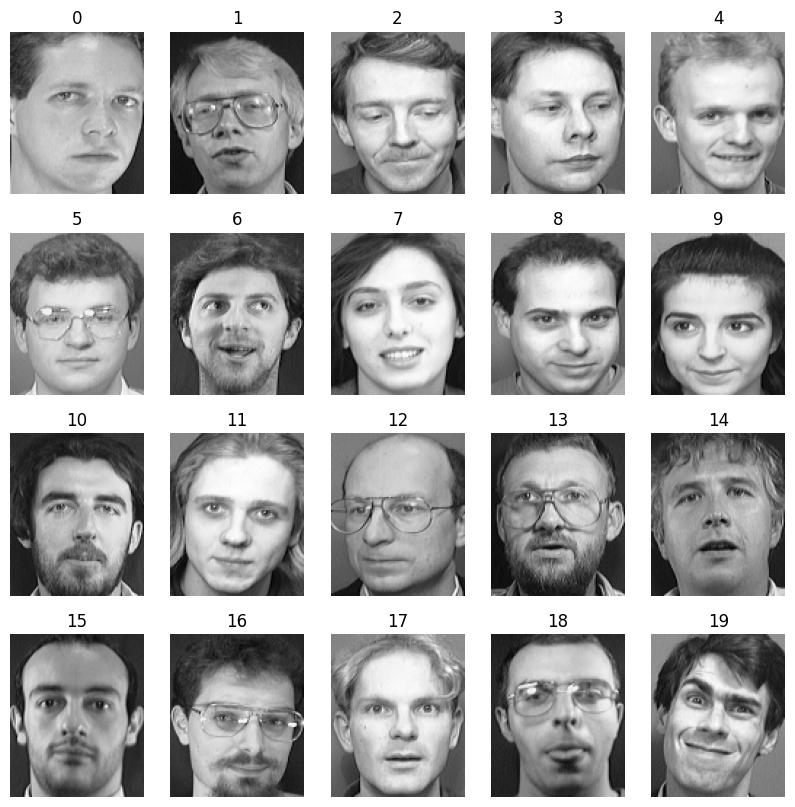

Training data size:  240
Validation data size:  80
Training data label size:  240
Validation data label size:  80
Testing data size:  80
Testing data label size:  80


C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 112, 92, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 46, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 41216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     5,275,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,330,452 (20.33 MB)

 Trainable params: 5,330,452 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#make the model
i=0
j=0

images = num.zeros((20,112,92,1))
ply.figure(figsize=(10,10))
for i in range(20):
    i = num.max(num.where(label_train==j)) 
    ply.subplot(4,5,j+1)
    ply.imshow(trainX[i], cmap='gray')
    ply.title(label_train[i])
    ply.axis('off')
    j= j+1
    images[j-1] = trainX[i]
ply.show()



X_test, X_val, y_test, y_val = train_test_split(testX, label_test, test_size=0.5, random_state=42, stratify=label_test)
X_train = trainX
y_train = label_train


print('Training data size: ', X_train.shape[0])
print('Validation data size: ', X_val.shape[0])
print('Training data label size: ', y_train.shape[0])
print('Validation data label size: ', y_val.shape[0])
print('Testing data size: ', X_test.shape[0])
print('Testing data label size: ', y_test.shape[0])



model = tef.keras.models.Sequential([
    tef.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same',input_shape=(112, 92, 1)),
    tef.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tef.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    tef.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tef.keras.layers.Flatten(),
    tef.keras.layers.Dense(128, activation='relu'),
    tef.keras.layers.Dropout(0.4),     
    tef.keras.layers.Dense(20, activation='softmax')])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.save_weights('peak_model.weights.h5')
model.summary()


In [37]:
# Training and Saving the model 
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data= (X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[   
        tef.keras.callbacks.ModelCheckpoint(filepath="peak_model.weights.h5",monitor="val_accuracy",verbose=1,save_best_only=True,save_weights_only=True,
        mode="auto",save_freq="epoch",initial_value_threshold=None,),
        tef.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=20,min_lr=0.0001,factor=0.1)])


model.save('My_model.h5')


model.load_weights('peak_model.weights.h5')

results = model.evaluate(x=X_test, y=y_test, verbose = 0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.0316 - loss: 3.5336
Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to peak_model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.0327 - loss: 3.5121 - val_accuracy: 0.0625 - val_loss: 2.9894 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0579 - loss: 2.9830
Epoch 2: val_accuracy improved from 0.06250 to 0.33750, saving model to peak_model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.0607 - loss: 2.9824 - val_accuracy: 0.3375 - val_loss: 2.9444 - learning_rate: 0.0010
Epoch 3/100
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3398 - loss: 2.8901
Epoch 3: val_accuracy improved from 0.33750 to 0.47500, saving model to peak_model.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.3309 - loss: 2.8794 - val_accuracy: 0.4750 - val_loss: 2.7403 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - 

Test Loss: 0.13685
Test Accuracy: 98.75%


Image to be Predicted with label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted probabilities:  [[1.3741696e-01 9.5667145e+01 7.4361643e-04 7.9618464e-04 7.7497430e-02
  1.4298345e-01 1.8709719e-02 1.6263861e-02 4.6957258e-04 4.9750611e-02
  4.7549441e-01 2.6390871e-02 7.3940918e-02 1.8997321e+00 1.1870084e+00
  4.6422318e-02 1.2061783e-02 9.5119281e-03 1.5566087e-01 2.0095364e-03]]
Predicted class:  1
Correct prediction
Image to be Predicted with label: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted probabilities:  [[3.8924962e-05 1.3531849e-04 2.3677727e-05 4.7899806e-03 2.9741324e-05
  1.7793472e-04 1.4664783e-03 9.9887578e-03 1.6540505e-03 8.5590102e-02
  4.0495831e+01 3.1550727e-03 1.2633248e-02 5.6706673e+01 2.3722975e+00
  2.4203290e-01 1.9249682e-04 1.5638049e-06 5.9358124e-02 3.9265999e-03]]
Predicted class:  13
Correct prediction
Image to be Predicted with label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted probabilities:  [[4.5455381e-02 9.7808968e-03 1.0754700

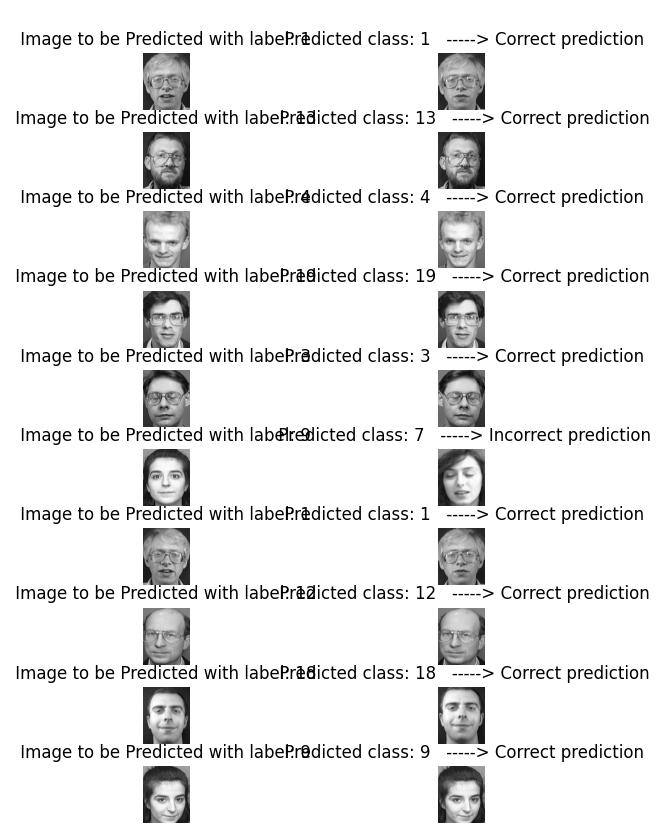

In [38]:
j=0
k=1
ply.figure(figsize=(7,10))
for m in range(10):
    rand = num.random.randint(0, len(X_test))
    test = X_test[rand]
    print('Image to be Predicted with label: {}'.format(y_test[rand]))
    # Converting the image dimension for model input compatibility
    test = num.expand_dims(test, axis=0)
    p = model.predict(test)
    pmax = num.argmax(p)
    print ('Predicted probabilities: ', p*100)
    print('Predicted class: ', pmax)
    if pmax == y_test[rand]:
        a = 'Correct prediction'
        print(a)
    else:
        a = 'Incorrect prediction'
        print(a)
    ply.subplot(10,2,j+1)  # Plot the image
    ply.imshow(X_test[rand], cmap='gray', )
    ply.title('\n Image to be Predicted with label: {} '.format(y_test[rand]))
    ply.axis('off')
    ply.subplot(10,2,k+1)  # Plot the predicted class
    i = num.max(num.where(y_test==pmax))
    ply.imshow(X_test[i], cmap='gray')
    ply.title('\n Predicted class: {}   '.format(pmax) + '-----> {}'.format(a))
    ply.axis('off')
    ply.subplots_adjust(hspace= 0.390)
    j= j+2
    k= k+2
ply.show()